In [1]:
%matplotlib inline
# %matplotlib widget

In [2]:
import numpy as np
import os

basepath = '../data/w3c'

path = os.path.join(basepath, 'w3c_simulated_Gparam.npy')
gparam = np.load(path)

path = os.path.join(basepath, 'w3c_simulated_bold.npy')
bold = np.load(path)

In [3]:
gparam

array([[1.1       ],
       [1.1       ],
       [1.1       ],
       ...,
       [1.10088678],
       [1.10034641],
       [1.10005543]])

In [4]:
bold.shape

(1667, 66)

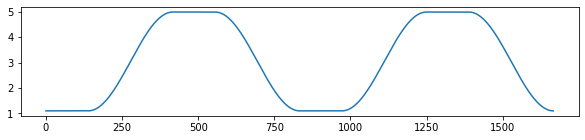

In [5]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,2))

plt.plot(gparam)

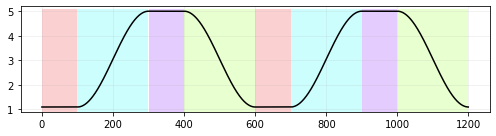

In [29]:
# import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


x = np.reshape(np.arange(0, len(gparam)), (len(gparam), 1))
trs = x * 0.72

# sns.set(rc={'figure.facecolor':'white'})

f = plt.figure(figsize=(7,2))
f.patch.set_facecolor('white')



plt.grid(alpha=0.2)

plt.plot(trs, gparam, 'black')

def create_rect(xs, ys, c, ax):
    x0, x1 = np.min(xs), np.max(xs)
    y0, y1 = np.min(ys), np.max(ys)
    rect = Rectangle((x0, 0.9), x1-x0, 4.2)
    pc = PatchCollection([rect], facecolor=c, alpha=0.2)
    ax.add_collection(pc)
    
ax = plt.gca()

for h1, h2 in [[0, 833], [834, 1666]]:
    low = (gparam == 1.1) & (x >= h1) & (x <= h2)
#     plt.plot(trs[low], gparam[low], color='#E81818')
    create_rect(trs[low], gparam[low], c='#E81818', ax=ax)
    high = (gparam == 5.0) & (x >= h1) & (x <= h2)
#     plt.plot(trs[high], gparam[high], '#7E00FD')
    create_rect(trs[high], gparam[high], c='#7E00FD', ax=ax)
    tplus = (gparam > 1.1) & (gparam < 5) & (x >= h1) & (x <= min(x[high]))
#     plt.plot(trs[tplus], gparam[tplus], '#00FDFD')
    create_rect(trs[tplus], gparam[tplus], c='#00FDFD', ax=ax)
    tminus = (gparam > 1.1) & (gparam < 5) & (x >= max(x[high])) & (x <= h2)
#     plt.plot(trs[tminus], gparam[tminus], '#8CFF17')
    create_rect(trs[tminus], gparam[tminus], c='#8CFF17', ax=ax)
    

plt.tight_layout()

plt.savefig('w3c-gplot.png', dpi=300)
plt.show()


In [44]:
l = x[:-1][gparam[1:] - gparam[:-1] != 0]

print(l[0])
for i,k in enumerate(l):
#     print('--', k)
    if i == len(l) - 1:
        print(l[i])
    elif l[i] != l[i+1]-1:
        print(l[i], l[i+1])

138
416 555
833 972
1249 1388
1665


In [25]:
833 * 2

1666

In [19]:
gparam[low]

array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
       1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.

In [11]:
sum(gparam == 1.1)

array([278])

In [12]:
np.max(gparam)

5.0

In [14]:
sum(gparam == 5.0)

array([278])

In [15]:
gparam.shape

(1667, 1)

In [23]:
states = ['low', 'up', 'trans_plus', 'trans_minus']

in_trans = 0
trans_idx = 0

task_labels = []
for k in range(0, gparam.shape[0]):
    if gparam[k] == 1.1 or gparam[k] == 5.0:
        task_labels.append(states[0 if gparam[k] == 1.1 else 1])
        if in_trans:
            in_trans = 0
            trans_idx = (trans_idx + 1) % 2
    else:
        if not in_trans:
            in_trans = 1
        task_labels.append(states[2 + trans_idx])
        
print(len(task_labels))

1667


In [25]:
with open(os.path.join(basepath, 'task_info.csv'), 'w') as out:
    out.write('task_name\n')
    for lbl in task_labels:
        out.write(lbl + '\n')

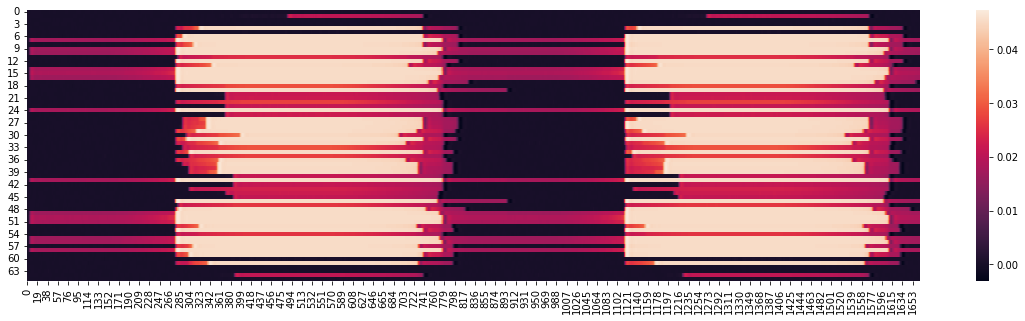

In [33]:
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.heatmap(bold.T)
plt.show()

## Explore added null data

In [7]:
import numpy as np
import os

basepath = '../data/w3c_wnull'

path = os.path.join(basepath, 'SBJ400.npy')
bold = np.load(path)

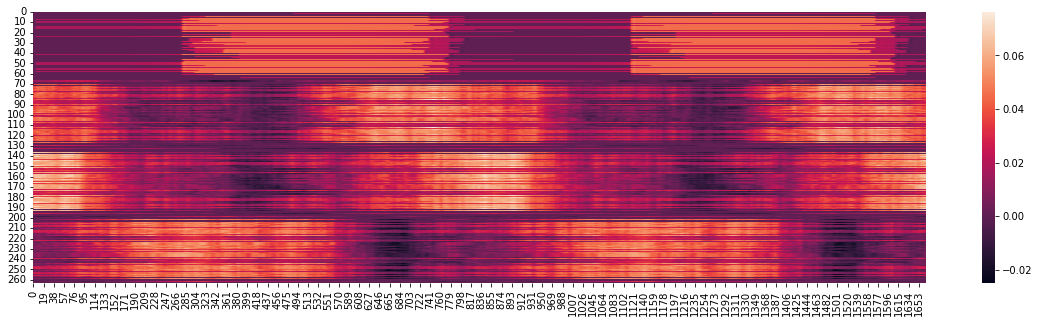

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.heatmap(bold.T)
plt.show()